# Statistics Advance

# Questions And Answer

Question 1 : What are Type I and Type II errors in hypothesis testing, and how do they
impact decision-making?
 - Type I error (α): Rejecting the null hypothesis H0 when it is actually true (a false positive). The probability of making a Type I error is the significance level α chosen by the researcher (commonly 0.05).

 Type II error (β): Failing to reject 𝐻0 when the alternative 𝐻1 is true (a false negative). The probability of correctly rejecting 𝐻0 when 𝐻1 is true is the power 1−β.

Impact on decision-making: Choosing a smaller 𝛼
α reduces Type I errors but usually increases β (reduces power). Balancing α and β depends on consequences: if false positives are costly, make α small; if false negatives are costly, prioritize power (increase sample size or effect size to reduce β).

Question 2- What is the P-value in hypothesis testing, and how should it be interpreted in the context of the null hypothesis?
 - The P-value is the probability, assuming the null hypothesis H0 is true, of observing a test statistic as extreme or more extreme than the one observed.

- Interpretation: A small P-value (below the pre-chosen α) indicates the observed data are unlikely under 𝐻0, so we reject 𝐻0. A large P-value means data are consistent with 𝐻0, so we fail to reject 𝐻0.

- Important cautions: P-value is not the probability that 𝐻0 is true. It depends on sample size: with large samples tiny differences can yield tiny P-values even if effect is practically negligible.

Question 3- Explain the difference between a Z-test and a T-test, including when to use each.
- Z-test: Used when the population standard deviation 𝜎
 is known or when sample size is large (by CLT) and the sampling distribution of the mean is approximately normal.

 - T-test: Used when 𝜎 is unknown and estimated from the sample (use sample standard deviation 𝑠). Uses Student’s t-distribution with 𝑛−1 degrees of freedom:

 - When to use each: If you know σ → Z-test. If σ unknown and sample is small (n < ~30) → T-test. For large n, t and z give similar results.

Question 4:What is a confidence interval, and how does the margin of error influence its width and interpretation?
- A confidence interval (CI) for a parameter (e.g., mean) is a range constructed from sample data that, under repeated sampling, contains the true parameter a specified percentage of the time (e.g., 95%). Example for mean with known σ: 𝑥ˉ±𝑧1−𝛼/2⋅𝜎𝑛xˉ±z1−α/2⋅nσ.

- Margin of error (ME) is the half-width of the CI: 𝑀𝐸=𝑧1−𝛼/2⋅𝜎𝑛ME=z 1−α/2⋅nσ (or use 𝑡 if σ unknown).

Influences on width: ME increases with higher confidence level (larger critical value), decreases with larger sample size 𝑛, and increases with larger population variability σ. Interpretation: a 95% CI [𝐿,𝑈][L,U] means the procedure yields intervals that contain the true parameter 95% of the time.

Question 5: Describe the purpose and assumptions of an ANOVA test. How does it extend hypothesis testing to more than two groups?
- Purpose: ANOVA (Analysis of Variance) tests whether the means across more than two groups are all equa (𝐻0:𝜇1=μ2=⋯=μk) versus at least one mean differs. It partitions total variability into “between-groups” and “within-groups” components and compares their ratio (F-statistic).

- Assumptions:

    -Observations are independent.

    -Each group’s residuals are approximately normally distributed.

    -Homogeneity of variances (equal variances) across groups.

- How it extends hypothesis testing: Instead of multiple pairwise t-tests (which inflate Type I error), ANOVA tests the global null for k groups with one test (using F distribution). If ANOVA is significant, follow-up post-hoc tests (e.g., Tukey) identify which group means differ.

In [2]:
 # Question 6: Write a Python program to perform a one-sample Z-test and interpret the result for a given dataset.

 # One-sample Z-test (Python)
import numpy as np
import scipy.stats as st

def one_sample_z_test(sample, mu0, sigma):
    """
    Performs a one-sample Z-test.
    sample : array-like of observed values
    mu0   : hypothesized population mean under H0
    sigma : known population standard deviation
    Returns: z_stat, p_value (two-sided)
    """
    sample = np.asarray(sample)
    n = len(sample)
    xbar = sample.mean()
    se = sigma / np.sqrt(n)
    z = (xbar - mu0) / se
    # two-sided p-value
    p = 2 * st.norm.sf(abs(z))
    return z, p

# Example usage:
if __name__ == "__main__":
    data = [5.1, 4.9, 5.3, 5.0, 5.2, 4.8]  # example sample
    z_stat, p_val = one_sample_z_test(data, mu0=5.0, sigma=0.5)
    print("z =", z_stat, "p-value =", p_val)
    if p_val < 0.05:
        print("Reject H0 at alpha=0.05")
    else:
        print("Fail to reject H0 at alpha=0.05")


z = 0.2449489742783169 p-value = 0.8064959405073407
Fail to reject H0 at alpha=0.05


Question 7:Simulate a dataset from a binomial distribution (n = 10, p = 0.5) using NumPy and plot the histogram.

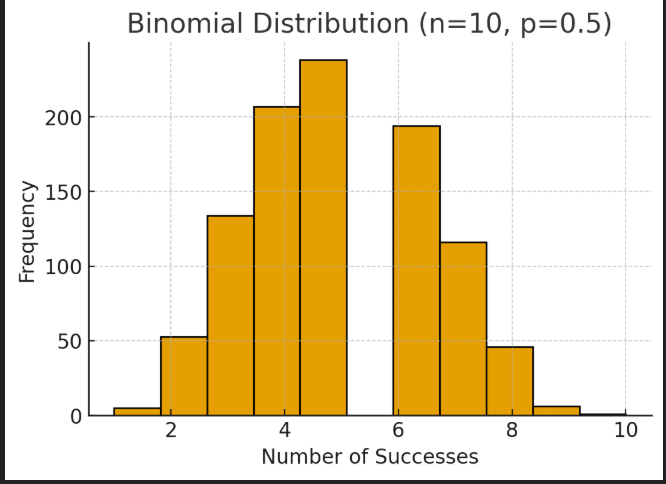


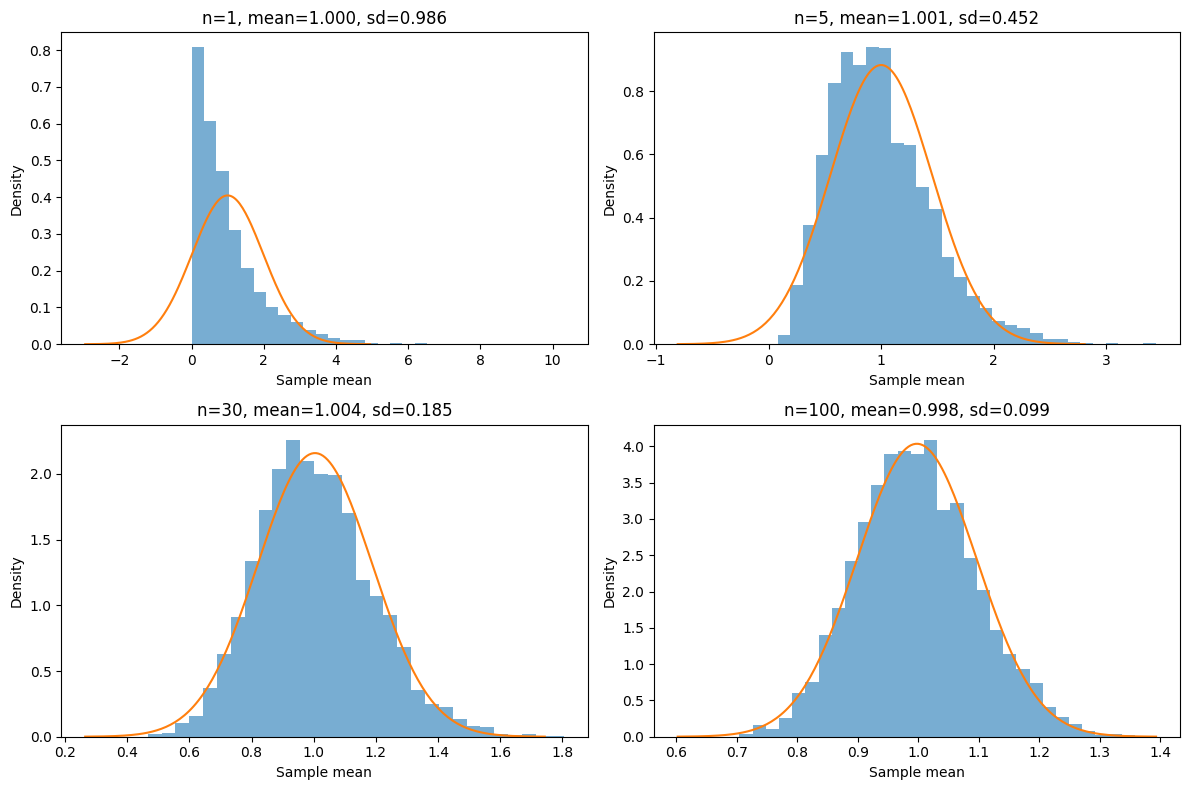

In [3]:
# Question 8: Generate multiple samples from a non-normal distribution and implement the Central Limit Theorem using Python.

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

def demonstrate_clt(dist='exponential', sample_sizes=[1,5,30,100], n_repeats=5000):
    """
    For each n in sample_sizes, draw n_repeats sample-means from the given distribution
    and plot histograms to show CLT in action.
    """
    plt.figure(figsize=(12, 8))
    for i, n in enumerate(sample_sizes, 1):
        if dist == 'exponential':
            draws = np.random.exponential(scale=1.0, size=(n_repeats, n))
        elif dist == 'uniform':
            draws = np.random.uniform(0, 1, size=(n_repeats, n))
        else:
            raise ValueError("Unsupported dist")

        sample_means = draws.mean(axis=1)
        plt.subplot(2, 2, i)
        plt.hist(sample_means, bins=30, density=True, alpha=0.6)
        # overlay normal approximation
        mu = sample_means.mean()
        sd = sample_means.std()
        x = np.linspace(mu - 4*sd, mu + 4*sd, 200)
        plt.plot(x, st.norm.pdf(x, mu, sd))
        plt.title(f"n={n}, mean={mu:.3f}, sd={sd:.3f}")
        plt.xlabel('Sample mean')
        plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

# Example:
if __name__ == "__main__":
    demonstrate_clt(dist='exponential', sample_sizes=[1,5,30,100], n_repeats=5000)

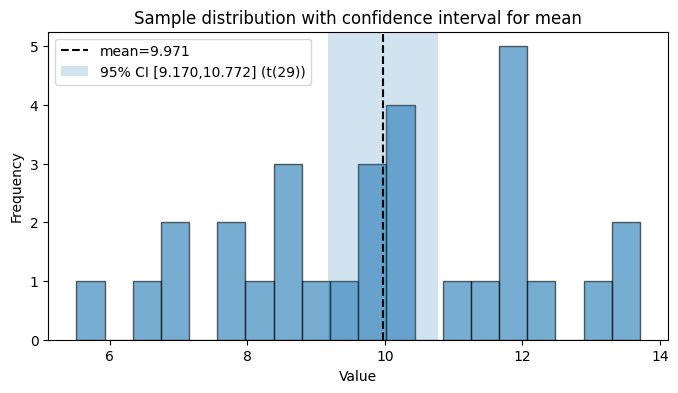

Mean: 9.970993268131965 95% CI: (np.float64(9.169934304587791), np.float64(10.772052231676138))


In [4]:
# Question 9: Write a Python function to calculate and visualize the confidence interval for a sample mean.

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

def ci_for_mean(sample, confidence=0.95, sigma=None, plot=True):
    """
    Compute CI for sample mean.
    If sigma is None -> use t-distribution; else use z (sigma known).
    Returns (mean, lower, upper).
    Optionally plots histogram with mean and CI.
    """
    sample = np.asarray(sample)
    n = len(sample)
    mean = sample.mean()
    if sigma is None:
        se = sample.std(ddof=1) / np.sqrt(n)
        df = n - 1
        t_crit = st.t.ppf(1 - (1 - confidence)/2, df)
        margin = t_crit * se
        dist_used = f"t({df})"
    else:
        se = sigma / np.sqrt(n)
        z_crit = st.norm.ppf(1 - (1 - confidence)/2)
        margin = z_crit * se
        dist_used = "z"
    lower = mean - margin
    upper = mean + margin

    if plot:
        plt.figure(figsize=(8,4))
        plt.hist(sample, bins=20, edgecolor='k', alpha=0.6)
        plt.axvline(mean, color='k', linestyle='--', label=f"mean={mean:.3f}")
        plt.axvspan(lower, upper, alpha=0.2, label=f"{int(confidence*100)}% CI [{lower:.3f},{upper:.3f}] ({dist_used})")
        plt.legend()
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.title('Sample distribution with confidence interval for mean')
        plt.show()
    return mean, lower, upper

# Example:
if __name__ == "__main__":
    data = np.random.normal(loc=10, scale=2, size=30)
    mean, lo, hi = ci_for_mean(data, confidence=0.95, sigma=None, plot=True)
    print("Mean:", mean, "95% CI:", (lo, hi))

In [5]:
# Question 10: Perform a Chi-square goodness-of-fit test using Python to compare observed and expected distributions, and explain the outcome.

import numpy as np
import scipy.stats as st

def chi_square_gof(observed_counts, expected_probs=None):
    """
    observed_counts : array-like counts per category
    expected_probs   : array-like expected probabilities per category (must sum to 1).
                       If None, assume uniform probabilities.
    Returns: chi2_stat, p_value, dof
    """
    obs = np.asarray(observed_counts)
    k = len(obs)
    N = obs.sum()
    if expected_probs is None:
        expected_probs = np.ones(k) / k
    expected = np.asarray(expected_probs) * N
    chi2_stat, p_value = st.chisquare(f_obs=obs, f_exp=expected)
    dof = k - 1
    return chi2_stat, p_value, dof, expected

# Example: observed rolls of a die
if __name__ == "__main__":
    observed = np.array([16, 18, 14, 12, 20, 20])  # e.g., 100 rolls
    chi2, p, dof, expected = chi_square_gof(observed)
    print("Observed:", observed)
    print("Expected:", expected)
    print("Chi2 =", chi2, "p-value =", p, "dof =", dof)
    if p < 0.05:
        print("Reject uniform (die may be biased) at alpha=0.05")
    else:
        print("Cannot reject uniformity (die consistent with fairness)")

Observed: [16 18 14 12 20 20]
Expected: [16.66666667 16.66666667 16.66666667 16.66666667 16.66666667 16.66666667]
Chi2 = 3.2000000000000006 p-value = 0.6691829020332432 dof = 5
Cannot reject uniformity (die consistent with fairness)
